## Esquinas
Harris - Shi/Tomassi

In [4]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [5]:
# Cargamos la imagen a procesar
img = cv.imread('chessboard2.png')
#img = cv.imread('bloques.png')

# La transformamos en escala de grises
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

#### Harris

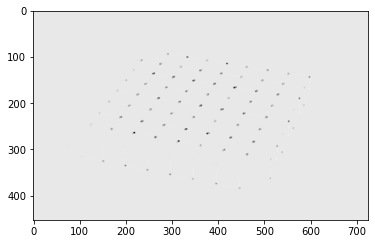

In [7]:
# Detector de esquinas de Harris (imagen, bloque, apertura del filtro de Sobel, k)
dst = cv.cornerHarris(gray,2,3,0.06)

# El resultado se dilata para marcar las esquinas (solo para mostrar)
dst = cv.dilate(dst,None)

# El umbral óptimo dependerá de la imagen
img_out=img.copy()
img_out[dst > 0.1 * dst.max()]=[0,0,255]

# Muestro la imagen y la salida del detector
cv.namedWindow("Harris",0)
cv.imshow('Harris',img_out)

plt.imshow(dst,cmap='binary')


In [10]:
# Agregamos subpixel

# Encontrar esquinas de Hough
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# Encontrar Centroides
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

# definir el criterio para detención y refinación de esquinas
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Dibujar esquinas
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
plt.imshow(img)
#cv.imwrite('subpixel5.png',img)

#### Shi - Tomassi

In [9]:
img_out=img.copy()

# Detector de esquinas de Shi-Tomassi (imagen, Nmax, calidad, distancia mínima)
#corners = cv.goodFeaturesToTrack(gray,10,0.01,20)
corners = cv.goodFeaturesToTrack(gray,98,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img_out,(x,y),3,255,-1)
    
img_out = cv.cvtColor(img_out,cv.COLOR_BGR2RGB)
plt.imshow(img_out,cmap='gray'),plt.show()

(<matplotlib.image.AxesImage at 0x1d9160efb80>, None)